In [1]:
import pandas as pd
import tensorflow as tf



In [2]:
df = pd.read_csv("reliance_data.csv")

In [3]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,01-01-1996,RELIANCE,EQ,204.65,205.00,206.10,203.65,NaN,205.75,205.26,3717450,7.630000e+13,NaN,NaN,NaN
1,02-01-1996,RELIANCE,EQ,205.75,205.25,206.25,202.65,NaN,204.15,204.13,6024650,1.230000e+14,NaN,NaN,NaN
2,03-01-1996,RELIANCE,EQ,204.15,207.50,216.95,205.25,NaN,205.70,207.04,7473500,1.550000e+14,NaN,NaN,NaN
3,04-01-1996,RELIANCE,EQ,205.70,203.75,204.40,201.05,NaN,203.80,202.47,7744000,1.570000e+14,NaN,NaN,NaN
4,05-01-1996,RELIANCE,EQ,203.80,203.00,203.00,200.65,NaN,202.40,202.05,5952000,1.200000e+14,NaN,NaN,NaN


In [4]:
df.shape

(6205, 15)

In [5]:
df.columns


Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [6]:
df1=df.reset_index()['Close']

In [25]:
df1.shape

(6205,)

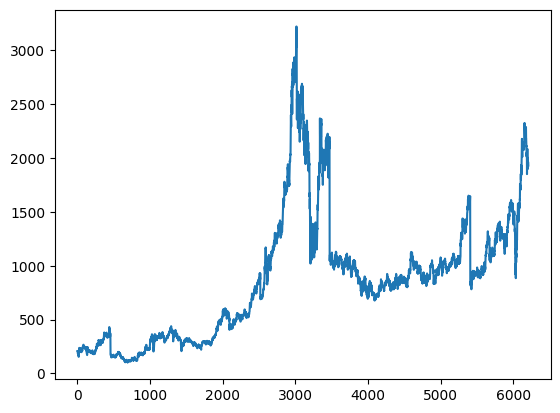

In [7]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [14]:
import numpy as np
df1

0        205.75
1        204.15
2        205.70
3        203.80
4        202.40
         ...   
6200    1950.70
6201    1964.05
6202    1947.80
6203    1952.60
6204    1929.80
Name: Close, Length: 6205, dtype: float64

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler (feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [16]:
df1

array([[0.03348239],
       [0.0329695 ],
       [0.03346637],
       ...,
       [0.5919123 ],
       [0.59345098],
       [0.58614223]])

**TRAIN TEST_SPLIT**





In [17]:
training_size = int(len(df1)*0.65)
test_size = len(df1)-training_size
train_data = df1[0:training_size]  # Select the first 'training_size' rows
test_data = df1[training_size:len(df1),:1]    # Select the remaining rows for testing


In [18]:
training_size,test_size

(4033, 2172)

In [19]:
import numpy
def create_dataset (dataset, time_step=1):
    dataX,dataY =[], []
    for i in range (len(dataset)-time_step-1):
      a = dataset[i:(i+time_step),0]
      dataX.append(a)
      dataY.append(dataset[i+time_step,0])
    return numpy.array(dataX),numpy.array(dataY)


In [20]:

time_step = 100
X_train , y_train = create_dataset(train_data, time_step)
X_test,ytest = create_dataset(test_data, time_step)

In [21]:
print (X_train.shape), print (y_train.shape)

(3932, 100)
(3932,)


(None, None)

In [22]:
print (X_test.shape),print(ytest.shape)

(2071, 100)
(2071,)


(None, None)

In [23]:
#3d
#reshape input to be [samples,time steps , features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [24]:
### create the stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [25]:
from sqlalchemy.sql.functions import localtimestamp
model = Sequential()
model.add(LSTM(50,return_sequences = True, input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss="mean_squared_error",optimizer ="adam")


In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=50,batch_size=64,verbose=1)

Epoch 1/50
62/62 [==============================] - 25s 280ms/step - loss: 0.0060 - val_loss: 6.6339e-04
Epoch 2/50
62/62 [==============================] - 16s 252ms/step - loss: 8.3621e-04 - val_loss: 5.6083e-04
Epoch 3/50
62/62 [==============================] - 16s 252ms/step - loss: 7.9360e-04 - val_loss: 9.3849e-04
Epoch 4/50
62/62 [==============================] - 19s 303ms/step - loss: 6.8579e-04 - val_loss: 6.5222e-04
Epoch 5/50
62/62 [==============================] - 16s 259ms/step - loss: 7.0543e-04 - val_loss: 4.1319e-04
Epoch 6/50
62/62 [==============================] - 16s 260ms/step - loss: 5.8003e-04 - val_loss: 4.6991e-04
Epoch 7/50
62/62 [==============================] - 17s 267ms/step - loss: 5.0060e-04 - val_loss: 3.5063e-04
Epoch 8/50
62/62 [==============================] - 16s 262ms/step - loss: 4.8116e-04 - val_loss: 4.5004e-04
Epoch 9/50
62/62 [==============================] - 16s 267ms/step - loss: 5.1498e-04 - val_loss: 3.1430e-04
Epoch 10/50
62/62 [====

In [59]:
tf.__version__

'2.12.0'

In [58]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

65/65 [==============================] - 3s 46ms/step


In [60]:
#Transformback to orginal form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [61]:
#calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

1009.0361291773004

In [62]:
#test data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))


1146.0607290830576

<function matplotlib.pyplot.show(close=None, block=None)>

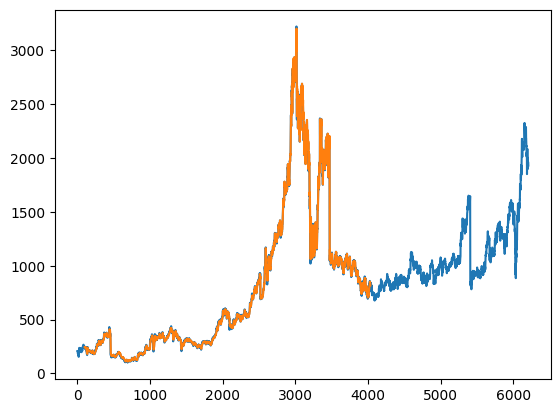

In [63]:
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] =np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
#shift test prediction for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[ :, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :]=test_predict
#plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.show

In [55]:
len(test_data)

2172

In [56]:
x_input=test_data[1000:].reshape(1,-1)
x_input.shape

(1, 1172)

In [65]:
# Define and initialize temp_input with some initial data points
temp_input = [1.0, 2.0, 3.0, ...]
lst_output = []
n_steps = 1172
i = 0

while (i < 30):
    if (len(temp_input) > 100):
        x_input = np.array(temp_input[1:])
        print('{} day input {}'.format(i, x_input))
        x_input = x_input.reshape(1, -1)
        X_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(X_input, verbose=0)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
    else:
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i = i + 1


[0.5866024]
5
[0.5866024]
6
[0.5866024]
7
[0.5866024]
8
[0.5866024]
9
[0.5866024]
10
[0.5866024]
11
[0.5866024]
12
[0.5866024]
13
[0.5866024]
14
[0.5866024]
15
[0.5866024]
16
[0.5866024]
17
[0.5866024]
18
[0.5866024]
19
[0.5866024]
20
[0.5866024]
21
[0.5866024]
22
[0.5866024]
23
[0.5866024]
24
[0.5866024]
25
[0.5866024]
26
[0.5866024]
27
[0.5866024]
28
[0.5866024]
29
[0.5866024]
30
[0.5866024]
31
[0.5866024]
32
[0.5866024]
33
[0.5866024]
34


In [66]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [67]:
import matplotlib.pyplot as plt

In [68]:
len(df1)-100

6105

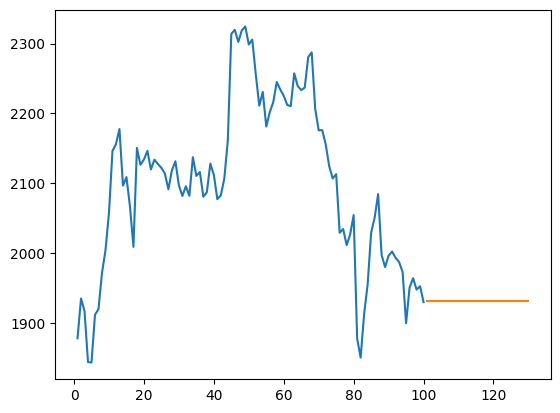

In [68]:
plt.plot(day_new,scaler.inverse_transform(df1[6105:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

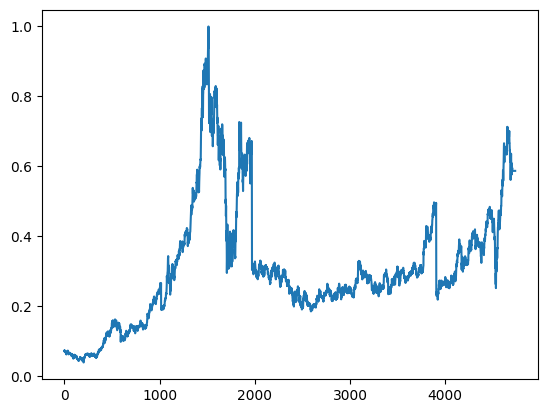

In [69]:
df3 = df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1500:])

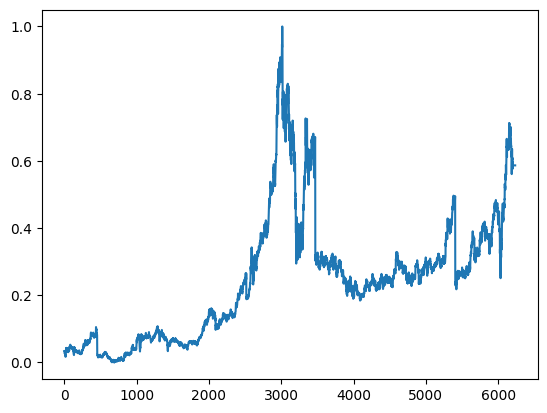

In [73]:
from sklearn.preprocessing import MinMaxScaler

# Assuming df3 is your data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df3)

# Perform some operations on scaled_data

# Inverse transform the scaled data
original_data = scaler.inverse_transform(scaled_data).tolist()

# Plot the original data
import matplotlib.pyplot as plt
plt.plot(original_data)
plt.show()


**THIS IS HOW WE PREDICT THE STOCK PRIZES**